In [195]:
from nltk.tokenize import word_tokenize
from collections import Counter
import os
import matplotlib.pyplot as plt
import re


In [196]:
kashubian_corpus_dir = r"C:\Users\erykd\Desktop\CS6363_Proj\kashubian_corpus_collection" # collections of various kashubian texts we found
kashub_alphabet = "aąãbcdeéëfghijklłmnńoòóôprstuùwyzż" # string that will help us focus on kashubian letters in the corpus
corpus_collection_str = ""
for corpus in os.listdir(kashubian_corpus_dir):
    with open(os.path.join(kashubian_corpus_dir, corpus)) as f:
        corpus_collection_str += f.read() + " "
        f.close()


kashub_counter = Counter(
    c for c in corpus_collection_str.casefold()
    if c in kashub_alphabet
)

print("Kashubian letter frequencies:")
# sampling 15 of the most common character occurences
for char, count in kashub_counter.most_common():
    print(f"{char:2} → {count:5}")


Kashubian letter frequencies:
a  → 338815
i  → 313833
z  → 300052
e  → 273178
n  → 234801
s  → 232666
o  → 221992
c  → 221098
r  → 215649
w  → 190234
k  → 166925
t  → 166740
d  → 158495
j  → 138770
m  → 134561
ë  → 133837
ò  → 124910
p  → 118160
l  → 107609
ł  → 83807
b  → 83615
ô  → 76749
g  → 72685
h  → 63594
u  → 61317
é  → 60157
ó  → 48887
y  → 47050
ą  → 42857
ã  → 42833
ż  → 37515
ù  → 37175
ń  → 15756
f  → 11437


In [197]:
# same representation as previous but in terms of percentages
total = sum(kashub_counter.values())
kashub_percentages = [(char, (count / total) * 100) for char, count in kashub_counter.most_common()]

print("Digraph percentages:")
for letter, percentage in kashub_percentages:
    print(f"{letter} → {percentage:.2f}%")

Digraph percentages:
a → 7.40%
i → 6.86%
z → 6.55%
e → 5.97%
n → 5.13%
s → 5.08%
o → 4.85%
c → 4.83%
r → 4.71%
w → 4.16%
k → 3.65%
t → 3.64%
d → 3.46%
j → 3.03%
m → 2.94%
ë → 2.92%
ò → 2.73%
p → 2.58%
l → 2.35%
ł → 1.83%
b → 1.83%
ô → 1.68%
g → 1.59%
h → 1.39%
u → 1.34%
é → 1.31%
ó → 1.07%
y → 1.03%
ą → 0.94%
ã → 0.94%
ż → 0.82%
ù → 0.81%
ń → 0.34%
f → 0.25%


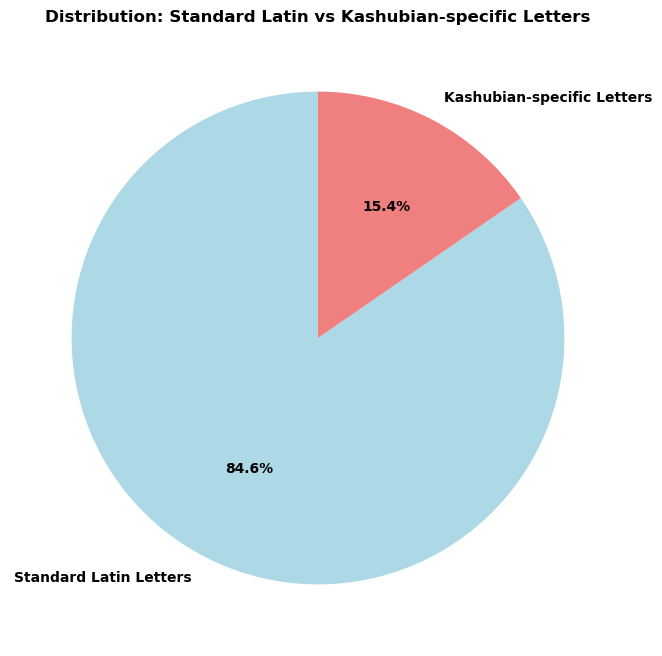

In [198]:
# standard alphabet to provide comparison
standard_latin = "abcdefghijklmnopqrstuvwxyz" 

# calculatulates total for each
standard_total = sum(kashub_counter[char] for char in standard_latin if char in kashub_counter)
kashub_specific_total = sum(kashub_counter[char] for char in kashub_alphabet if char not in standard_latin)

labels = ['Standard Latin Letters', 'Kashubian-specific Letters']
sizes = [standard_total, kashub_specific_total]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
                                   textprops={'fontweight': 'bold'})

# better contrast and visibility
for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.title('Distribution: Standard Latin vs Kashubian-specific Letters', fontweight='bold')
plt.show()

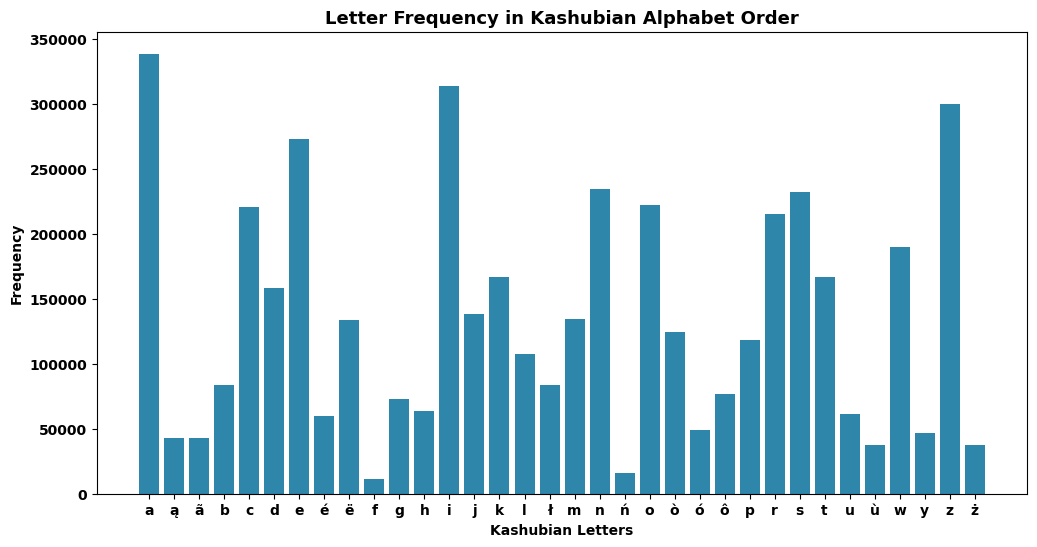

In [199]:
# ordering our letter-count pairs in order
letters = [char for char in kashub_alphabet if char in kashub_counter]
counts = [kashub_counter[char] for char in kashub_alphabet if char in kashub_counter]

# simple plot with better contrast
plt.figure(figsize=(12, 6))
plt.bar(letters, counts, color='#2E86AB')

plt.xlabel('Kashubian Letters', fontweight='bold')  
plt.ylabel('Frequency', fontweight='bold') 
plt.title('Letter Frequency in Kashubian Alphabet Order', fontweight='bold', fontsize=13)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [200]:
# getting the frequency of digraphs
kashub_tokens = word_tokenize(corpus_collection_str)
digraph_list = ["ch", "cz", "dz", "dż", "rz", "sz"]

pattern = '|'.join(re.escape(dg) for dg in digraph_list)
digraph_counts = Counter(re.findall(pattern, corpus_collection_str))


print("Digraph frequencies:")
for digraph, count in digraph_counts.most_common():
    print(f"{digraph} → {count}")
    

Digraph frequencies:
cz → 68421
ch → 54106
rz → 50125
sz → 48803
dz → 33188
dż → 3982


In [201]:
# same representation as previous but in terms of percentages
total = sum(digraph_counts.values())
digraph_percentages = [(char, (count / total) * 100) for char, count in digraph_counts.most_common()]

print("Digraph percentages:")
for letter, percentage in digraph_percentages:
    print(f"{letter} → {percentage:.2f}%")

Digraph percentages:
cz → 26.46%
ch → 20.92%
rz → 19.38%
sz → 18.87%
dz → 12.83%
dż → 1.54%


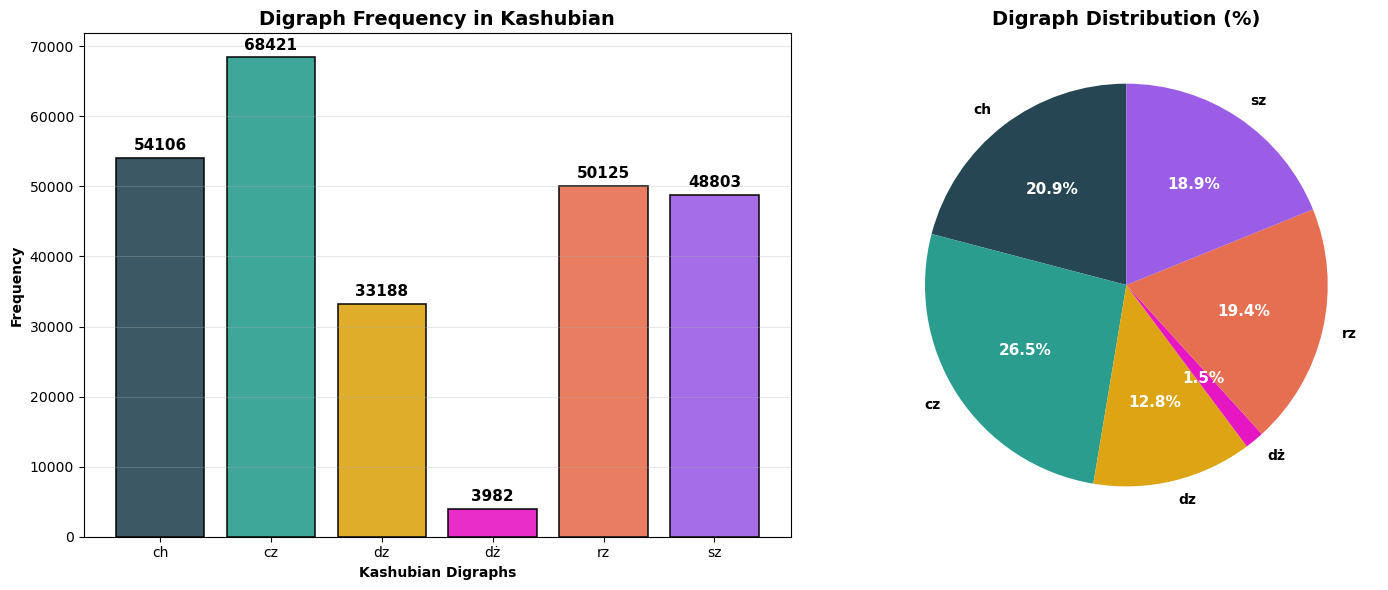

In [202]:
# ordering our digraph-count pairs
digraphs = [dg for dg in digraph_list if dg in digraph_counts]
counts = [digraph_counts[dg] for dg in digraph_list if dg in digraph_counts]

# convert digraph frequencies to percentages
total_digraphs = sum(counts)
percentages = [(count / total_digraphs) * 100 for count in counts]

# dividing our plots into 2 different sections
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#264653', '#2A9D8F', "#DDA413", "#E616C3", '#E76F51', '#9B5DE5']

# setup for the bars on the right
bars = ax1.bar(digraphs, counts, color=colors[:len(digraphs)], 
               edgecolor='black', linewidth=1.2, alpha=0.9)
ax1.set_xlabel('Kashubian Digraphs', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Digraph Frequency in Kashubian', fontweight='bold', fontsize=14)
ax1.tick_params(axis='x')
ax1.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
             f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=11)
# setup for the pie on the right
wedges, texts, autotexts = ax2.pie(counts, labels=digraphs, autopct='%1.1f%%',
                                  startangle=90, colors=colors[:len(digraphs)],
                                  textprops={'fontweight': 'bold'})
ax2.set_title('Digraph Distribution (%)', fontweight='bold', fontsize=14)

# improves contrast for the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

In [203]:
# token's first char whose length is greater than 1
words = [token for token in kashub_tokens if token and token[0].lower() in kashub_alphabet and len(token) > 1]  
# extracting the first letter
first_letters = [word[0].lower() for word in words]
# first letter occurence counterr
f_letter_counter = Counter(first_letters)
print("First Letter Frequencies:")
for letter, count in f_letter_counter.most_common():
    print(f"{letter} → {count}")

First Letter Frequencies:
p → 76993
s → 74583
n → 60533
j → 54454
w → 50424
k → 47445
t → 47037
d → 45966
m → 42508
c → 39346
z → 36613
r → 33187
b → 32717
g → 24271
ò → 22537
l → 18368
a → 12977
ż → 9898
ù → 9468
f → 5003
o → 4777
h → 4584
i → 4538
e → 3570
ł → 2651
u → 2013
ô → 900
ó → 252
é → 110
y → 84
ë → 36
ã → 22
ń → 13
ą → 9


In [204]:
# same representation as previous but in terms of percentages
total = sum(f_letter_counter.values())
f_letter_percentages = [(char, (count / total) * 100) for char, count in f_letter_counter.most_common()]

print("First letter percentages:")
for letter, percentage in f_letter_percentages:
    print(f"{letter} → {percentage:.3f}%") # more accuracy to accomdate lower percentages
    

First letter percentages:
p → 10.027%
s → 9.713%
n → 7.883%
j → 7.091%
w → 6.567%
k → 6.179%
t → 6.126%
d → 5.986%
m → 5.536%
c → 5.124%
z → 4.768%
r → 4.322%
b → 4.261%
g → 3.161%
ò → 2.935%
l → 2.392%
a → 1.690%
ż → 1.289%
ù → 1.233%
f → 0.652%
o → 0.622%
h → 0.597%
i → 0.591%
e → 0.465%
ł → 0.345%
u → 0.262%
ô → 0.117%
ó → 0.033%
é → 0.014%
y → 0.011%
ë → 0.005%
ã → 0.003%
ń → 0.002%
ą → 0.001%


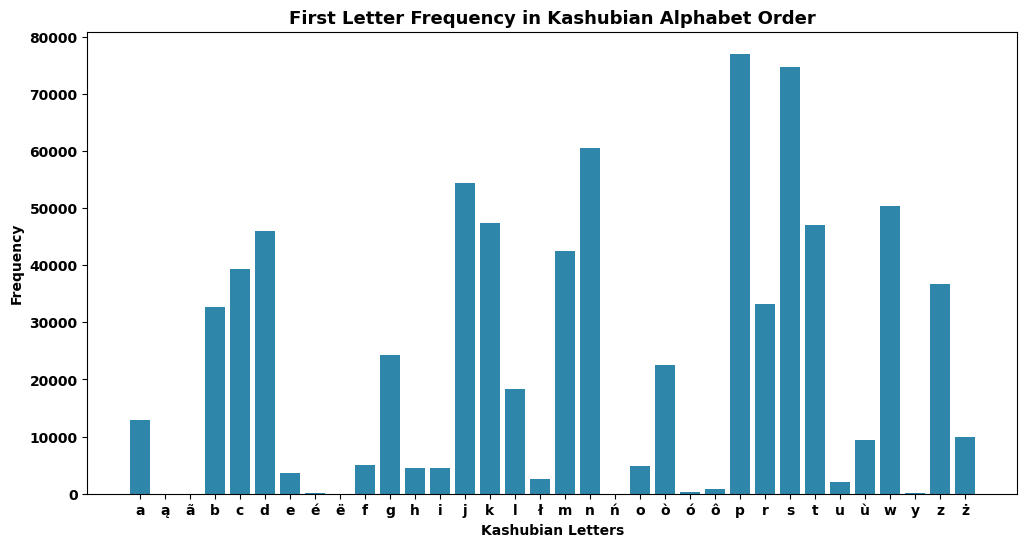

In [212]:
# ordering our letter-count pairs in order
f_letters = [char for char in kashub_alphabet if char in f_letter_counter]
f_counts = [f_letter_counter[char] for char in kashub_alphabet if char in f_letter_counter]

# simple plot with better contrast
plt.figure(figsize=(12, 6))
plt.bar(f_letters, f_counts, color='#2E86AB')

plt.xlabel('Kashubian Letters', fontweight='bold')  
plt.ylabel('Frequency', fontweight='bold') 
plt.title('First Letter Frequency in Kashubian Alphabet Order', fontweight='bold', fontsize=13)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [206]:
# token's last char whose length is greater than 1
words = [token for token in kashub_tokens if token and token[len(token)-1].lower() in kashub_alphabet and len(token) > 1]  
# extracting the last letter
last_letters = [word[len(word)-1].lower() for word in words]
# last letter occurence counter
l_letter_counter = Counter(last_letters)
print("First Letter Frequencies:")
for letter, count in l_letter_counter.most_common():
    print(f"{letter} → {count}")

First Letter Frequencies:
a → 94307
e → 85440
i → 58882
o → 52791
ë → 45730
m → 33782
h → 28691
k → 27742
ô → 27608
ò → 26848
ł → 26054
ã → 24629
ą → 23405
é → 21463
y → 20403
u → 19586
c → 17754
w → 17140
z → 13534
n → 13370
d → 12172
ù → 11885
s → 10586
j → 10211
t → 8117
ż → 5462
r → 5185
l → 5086
g → 2772
p → 2483
b → 2018
ń → 1559
f → 741
ó → 123


In [207]:
# same representation as previous but in terms of percentages
total = sum(l_letter_counter.values())
l_letter_percentages = [(char, (count / total) * 100) for char, count in l_letter_counter.most_common()]

print("First letter percentages:")
for letter, percentage in l_letter_percentages:
    print(f"{letter} → {percentage:.3f}%") # more accuracy to accomdate lower percentages
    

First letter percentages:
a → 12.449%
e → 11.278%
i → 7.773%
o → 6.969%
ë → 6.036%
m → 4.459%
h → 3.787%
k → 3.662%
ô → 3.644%
ò → 3.544%
ł → 3.439%
ã → 3.251%
ą → 3.090%
é → 2.833%
y → 2.693%
u → 2.585%
c → 2.344%
w → 2.263%
z → 1.787%
n → 1.765%
d → 1.607%
ù → 1.569%
s → 1.397%
j → 1.348%
t → 1.071%
ż → 0.721%
r → 0.684%
l → 0.671%
g → 0.366%
p → 0.328%
b → 0.266%
ń → 0.206%
f → 0.098%
ó → 0.016%


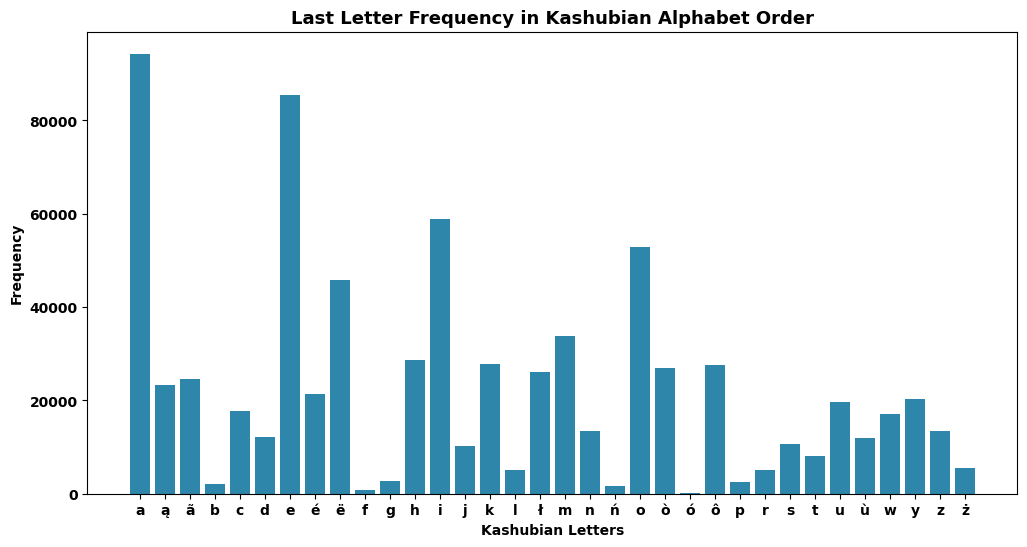

In [211]:
# ordering our l_letter-count pairs in order
l_letters = [char for char in kashub_alphabet if char in l_letter_counter]
l_counts = [l_letter_counter[char] for char in kashub_alphabet if char in l_letter_counter]

# simple plot with better contrast
plt.figure(figsize=(12, 6))
plt.bar(l_letters, l_counts, color='#2E86AB')

plt.xlabel('Kashubian Letters', fontweight='bold')  
plt.ylabel('Frequency', fontweight='bold') 
plt.title('Last Letter Frequency in Kashubian Alphabet Order', fontweight='bold', fontsize=13)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [209]:
print(f"Data consists of {len(kashub_tokens)} tokens")


Data consists of 1132702 tokens


In [210]:
print(f"Data contains {len(corpus_collection_str)} characters")

Data contains 6081484 characters
